### Exploratory Data Analysis 

Employee turnover is a key problem faced by many organizations. When good people leave, it usually costs the organization substantial time and other resources to find a replacement. Therefore, many organizations try to keep the churn rate at a low level. Imagine a company who now wants to understand its employee churn situation. Its HR (Human Resources) department gives you some data of their employees, and asks you to do exploratory data analysis and to predict employee churn.

You are free to choose any statistics library to analyze the data. In your answer, please include both the snippets of your code as well as the outputs.

Download the data `termination.csv` and `.ipynb` template from Canvas. Use the downloaded resources to answer the following questions:

#### a. (2 pts) Display a summary of the data (i.e. min, max, mean and quartiles for each variable). In the summary statistics, are there any meaningless quantities?

In [2]:
# Step 1: Load essential packages -- refer to recitation

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import pandas.util.testing as tm

<ipython-input-3-9f52c2296927>:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Step 2: load data using read_csv function

In [5]:
df = pd.read_csv('termination.csv')

In [6]:
# step 3: Invoke appropriate function on the loaded data to get the summary statistics

In [7]:
df.describe(include='all',percentiles=[])

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
count,49653.000000,49653,49653,49653,49653,49653.000000,49653.000000,49653,49653,49653,49653.000000,49653,49653,49653,49653,49653.000000,49653,49653
unique,NaN,130,5342,4415,1055,NaN,NaN,40,21,47,NaN,2,2,4,3,NaN,2,2
top,NaN,12/31/2013 0:00,1954-08-04,2006-02-26,1900-01-01,NaN,NaN,Vancouver,Meats,Meat Cutter,NaN,F,Female,Not Applicable,Not Applicable,NaN,ACTIVE,STORES
freq,NaN,5215,40,50,42450,NaN,NaN,11211,10269,9984,NaN,25898,25898,41853,41853,NaN,48168,49068
mean,4859.495740,NaN,NaN,NaN,NaN,42.077035,10.434596,NaN,NaN,NaN,27.297605,NaN,NaN,NaN,NaN,2010.612612,NaN,NaN
std,1826.571142,NaN,NaN,NaN,NaN,12.427257,6.325286,NaN,NaN,NaN,13.514134,NaN,NaN,NaN,NaN,2.845577,NaN,NaN
min,1318.000000,NaN,NaN,NaN,NaN,19.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2006.000000,NaN,NaN
50%,5031.000000,NaN,NaN,NaN,NaN,42.000000,10.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
max,8336.000000,NaN,NaN,NaN,NaN,65.000000,26.000000,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN


#### b. (5 pts) The data include 10 years (2006 - 2015) of records for both active and terminated employees. Status Year field shows the year of data, and Status field shows the employment status – ACTIVE or TERMINATED in the corresponding status year. The company is interested in what proportion of the staff are leaving. Compute: 1) the percent of terminated employees out of all employees for each year; 2) average termination rate over the 10 years?

In [8]:
# Step 1: Create a pivot_table indexing STATUS_YEAR and apply to STATUS column

In [15]:
#df.groupby(['STATUS_YEAR', 'STATUS'])['STATUS'].aggregate('count').unstack()
df.pivot_table(index=['STATUS_YEAR'], columns=['STATUS'], values='EmployeeID', aggfunc='count', margins=True)

STATUS,ACTIVE,TERMINATED,All
STATUS_YEAR,,,
2006,4445,134,4579
2007,4521,162,4683
2008,4603,164,4767
2009,4710,142,4852
2010,4840,123,4963
2011,4972,110,5082
2012,5101,130,5231
2013,5215,105,5320
2014,4962,253,5215


In [150]:
# Step 2: Based on the pivot_table, find total number of employees each year

In [19]:
df2 = df.groupby(['STATUS_YEAR', 'STATUS'])['STATUS'].aggregate('count').unstack()
df2['TOTAL'] = df2.ACTIVE + df2.TERMINATED
print(df2)

STATUS       ACTIVE  TERMINATED  TOTAL
STATUS_YEAR                           
2006           4445         134   4579
2007           4521         162   4683
2008           4603         164   4767
2009           4710         142   4852
2010           4840         123   4963
2011           4972         110   5082
2012           5101         130   5231
2013           5215         105   5320
2014           4962         253   5215
2015           4799         162   4961


In [20]:
# Step 3: Now compute the percentage

In [21]:
df2['Percent_Terminated'] = df2.TERMINATED / df2.TOTAL * 100
print(df2)

STATUS       ACTIVE  TERMINATED  TOTAL  Percent_Terminated
STATUS_YEAR                                               
2006           4445         134   4579            2.926403
2007           4521         162   4683            3.459321
2008           4603         164   4767            3.440319
2009           4710         142   4852            2.926628
2010           4840         123   4963            2.478340
2011           4972         110   5082            2.164502
2012           5101         130   5231            2.485184
2013           5215         105   5320            1.973684
2014           4962         253   5215            4.851390
2015           4799         162   4961            3.265471


In [22]:
# Step 4: Invoke a function to compute average on the calculated percentage.

In [23]:
print('The average pergentage of terminated employees each year is: ' + 
      str(df2['Percent_Terminated'].mean()))

The average pergentage of terminated employees each year is: 2.997124260410164


#### c.(5 pts) In addition to the proportion of terminated employees, the company wants to know more about different types of termination. Give a stacked bar chart of terminates, where x-axis is status year, y-axis is number of terminated employees, and different colors in a bar show different termination reasons (‘termreason desc’ field in the data). What do you observe in this plot?

In [156]:
# Step 1: Filter dataframe for the relevant status for this question

In [160]:
df_filtered = df.filter(['STATUS_YEAR', 'termreason_desc', 'STATUS'])
term_mask = df['STATUS'] == 'TERMINATED'
df_filtered = df_filtered[term_mask]
print(df_filtered)

       STATUS_YEAR termreason_desc      STATUS
48168         2010      Retirement  TERMINATED
48169         2011      Retirement  TERMINATED
48170         2006      Retirement  TERMINATED
48171         2011      Retirement  TERMINATED
48172         2012      Retirement  TERMINATED
...            ...             ...         ...
49648         2013      Resignaton  TERMINATED
49649         2014      Retirement  TERMINATED
49650         2012      Retirement  TERMINATED
49651         2013      Resignaton  TERMINATED
49652         2007      Retirement  TERMINATED

[1485 rows x 3 columns]


In [158]:
# Step 2: Similar to part (b) create pivot table on column termreason_desc

In [173]:
df_aggregate_term = df_filtered.groupby(['STATUS_YEAR', 'termreason_desc']).aggregate(
    'count').unstack()
print(df_aggregate_term)

                STATUS                      
termreason_desc Layoff Resignaton Retirement
STATUS_YEAR                                 
2006               NaN       12.0      122.0
2007               NaN       25.0      137.0
2008               NaN       26.0      138.0
2009               NaN       18.0      124.0
2010               NaN       29.0       94.0
2011               NaN       69.0       41.0
2012               NaN       76.0       54.0
2013               NaN       49.0       56.0
2014             142.0       55.0       56.0
2015              73.0       26.0       63.0


In [57]:
# Step 3: Plot stacked bar chart using pandas plot bar function


[]

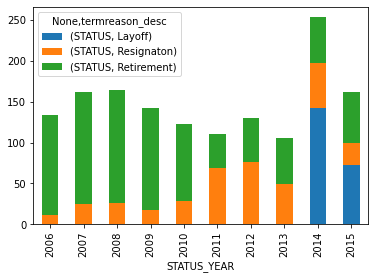

In [175]:
ax = df_aggregate_term.plot.bar(stacked=True)
ax.plot()

### ***For the first few years, the majority of terminated employees are retired. But after 2010, that shifts to resignations and then in 2014 the majority shifts a second time to layoffs***


#### d. (3 pts) Does Age affect termination? Draw (2) Box-plots of Age for active and terminated employees separately. What does the box-plot tell you?

In [58]:
# Step 1: Use pandas boxplot for this part

Text(0, 0.5, 'Age (in year)')

<Figure size 720x432 with 0 Axes>

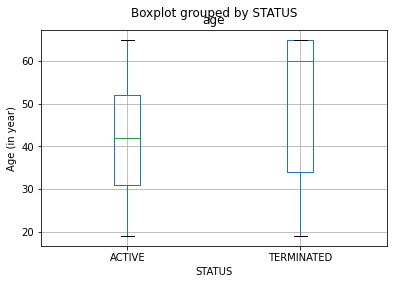

In [32]:
plt.figure(figsize=(10, 6))
df.boxplot(column=['age'], by='STATUS')
plt.ylabel('Age (in year)')

#### The box plots show that the terminated employees have a higher mean age.  It also indicates that the interquartile range is larger for terminated employees and the 25th percentile is higher for terminated employees as well.